BR_R002/2021-08-31/split/23KPR00/products/interim/cogs/2014-01-09.tif

BR_R002/2021-08-31/split/23KPR00/products/bas_intermediates/interim/lsma.npy

In [122]:

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [173]:
mat_in = sio.loadmat('inputs/Landsat_separate_images_BR_R002.mat')
# mat_out = sio.loadmat('outputs/output_BH_R001_39RVK50_2014_01_15.mat')
mat_out = sio.loadmat('outputs/output_BR_R002_23KPR00_2014_01_09_max_iter150_T0.0150.mat')
#load npy file
lsma_out = np.load('outputs/lsma.npy')

BR_R002_23KPQ09_2021_08_24


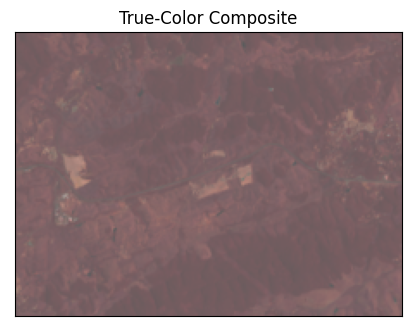

In [167]:
plot_rand = True
# plot_rand = False
if plot_rand:
    # get a random image from mat_in
    import random
    img_key = random.choice([ key for key in mat_in.keys()])# if key.startswith('BH_R001_39RVK60')])
    print(img_key)
    img_key = 'BR_R002_23KPR00_2014_01_09'
    rand_img = mat_in[img_key]

    # Normalize the original image for visualization purposes
    image_min = np.min(rand_img)
    image_max = np.max(rand_img)
    normalized_image = (rand_img - image_min) / (image_max - image_min)

    # Create a true-color composite
    true_color = np.stack([normalized_image[:, :, 4],  # Red
                           normalized_image[:, :, 2],  # Green
                           normalized_image[:, :, 1]],  # Blue
                           axis=-1)

    fig, axes = plt.subplots(1, 1, figsize=(5, 5))

    # Plot the true-color composite
    ax = axes
    ax.imshow(true_color)
    ax.set_title('True-Color Composite')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [174]:
region = 'BR_R002_23KPR00_2014_01_09'
img_in = mat_in[region]
Aest = mat_out['Aest']
sest = mat_out['sest']

print(img_in.shape)
print(Aest.shape)
print(sest.shape)

(165, 225, 8)
(8, 5)
(5, 1380)


In [175]:
# Normalize the original image for visualization purposes
image_min = np.min(img_in)
image_max = np.max(img_in)
normalized_image = (img_in - image_min) / (image_max - image_min)

# Create a true-color composite
true_color = np.stack([normalized_image[:, :, 4],  # Red
                       normalized_image[:, :, 2],  # Green
                       normalized_image[:, :, 1]],  # Blue
                      axis=-1)

# Reshape the sest matrix to match the original image's spatial dimensions
height, width = img_in.shape[:2]
num_endmembers = Aest.shape[1]

# Assuming the unmixing algorithm processes the data in column-major order
abundance_maps = np.reshape(sest.T, (height, width, num_endmembers), order='F')

# Plot the original image and the abundance maps
fig, axes = plt.subplots(1, num_endmembers + 1, figsize=(3 * (num_endmembers + 1), 5))

# Plot the true-color composite
ax = axes[0]
ax.imshow(true_color)
ax.set_title('True-Color Composite')
ax.set_xticks([])
ax.set_yticks([])

fig.suptitle(region, fontsize=12, fontweight='bold')
# Plot the abundance maps
for i in range(num_endmembers):
    ax = axes[i + 1]
    im = ax.imshow(abundance_maps[:, :, i], cmap='viridis', vmin=0, vmax=1)
    ax.set_title(f'Abundance Map {i + 1}')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
fig.tight_layout()
plt.show()


ValueError: cannot reshape array of size 6900 into shape (165,225,5)